# 🧠 What is Machine Learning?
### 🔍 Definition:

  Machine Learning is a way for computers to learn patterns from data without being explicitly programmed.

It’s used in:

* Recommending YouTube videos

* Detecting spam

* Translating languages

* Powering ChatGPT

### 🔧 How ML Works (In Simple Steps):

1. Collect data 

1. Prepare data (cleaning, exploring)

1. Train a model (let it learn patterns)

1. Evaluate (how good is it?)

1. Predict (make it do real tasks!)

#### **✅ Step 1: Import Libraries**

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### **✅ Step 2: Load Data**

In [63]:
df = pd.read_csv('titanic.csv')

In [64]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


#### **✅ Step 3: Preprocess Data (Minimal)**

We'll use only simple columns for now:

* Pclass (ticket class)

* Sex (we’ll convert to number)

* Age (fill missing with mean)

* Survived (our target label)

In [65]:
df = df[['Pclass', 'Sex', 'Age', 'Survived']]

#Convert 'Sex' to numbers
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Fill missing 'Age' with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

#### **✅ Step 4: Split Features and Labels**

In [66]:
X = df[['Pclass', 'Sex', 'Age']] # Features (input variables)

y = df['Survived'] # Target variable (output variable)

#### **Step 5: Train/Test Split**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### **Explanation:**
-> X, y

* X: Your features (input variables) — everything used to predict the outcome.

* y: Your target (output variable) — what you're trying to predict.

    * For example, in the Titanic dataset:
        * X might be: Age, Sex, Fare, Pclass, etc
        * y might be: Survived (0 or 1)

-> test_size=0.2

 * Tells the function to use 20% of the data for testing, and 80% for training.

-> random_state=42

* Sets a random seed so that you get the same split every time you run the code.

* This is useful for reproducibility — especially when comparing models or debugging.

Output Variables:

  * X_train: Features used to train the model

  * X_test: Features used to test the model

  * y_train: Target values for training

  * y_test: Target values for testing

#### **✅ Step 6: Train Logistic Regression Model**

In [68]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### **✅ Step 7: Predict and Evaluate**

In [69]:
pred_y = model.predict(X_test)

accuracy = accuracy_score(y_test,pred_y)

print (f"Model Accuracy:{accuracy:.2f}")


Model Accuracy:0.81


## **Level up ~**

#### **🔁 Upgrade: Improve the Titanic Model**
We'll go from basic logistic regression → a more complete model using:
 * 🔹 More features* 
 * 🔹 Better preprocessing* 
 * 🔹 A Random Forest Classifier

#### **✅ Step 1: Import & Load**

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('titanic.csv')


In [71]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


#### **✅ Step 2: Select & Prepare More Features**
We’ll use:

 * Pclass, Sex, Age, Fare, SibSp, Parch, Embarked

In [72]:
# Keep selected features
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked', 'Survived']]

# Convert 'Sex' to 0/1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Fill missing Age and Fare with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

# Fill missing Embarked with mode and encode it
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) # one-hot encoding


#### **Fill missing values with the mode (most common value)**
Since 'S' appears the most, the NaN becomes 'S'.
| PassengerId | Embarked          |
| ----------- | ----------------- |
| 1           | S                 |
| 2           | C                 |
| 3           | S        ← filled |
| 4           | Q                 |
| 5           | S                 |

#### **One-hot encoding with drop_first=True**
This turns the Embarked column into two new columns:
| PassengerId | Embarked\_Q | Embarked\_S |
| ----------- | ----------- | ----------- |
| 1           | 0           | 1           |
| 2           | 0           | 0           |
| 3           | 0           | 1           |
| 4           | 1           | 0           |
| 5           | 0           | 1           |

* 'C' is dropped because of drop_first=True (so we avoid 3 perfectly correlated columns).

* Now the model can understand 'Embarked' using numbers instead of text.

#### **✅ Step 3: Train/Test Split**

In [73]:
X = df.drop('Survived', axis=1) # Features (input variables)
y = df['Survived'] # Target variable (output variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **✅ Step 4: Train a Random Forest Classifier**

In [74]:
model = RandomForestClassifier(n_estimators = 100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##### **✅ What is RandomForestClassifier?**

It’s an ensemble learning model that combines many decision trees to make better predictions.

 * Each tree gives a "vote," and the final output is based on the majority vote.

 * It’s great for both accuracy and avoiding overfitting.

##### **Explanation:**
 model = RandomForestClassifier(n_estimators=100, random_state=42)

   * You’re creating a model object here.

   * n_estimators=100:

     You are building a forest of 100 decision trees.

       * More trees = generally better performance (but slower).

   * random_state=42:

     This fixes the randomness — so you always get the same model results each time (just like with train_test_split).

#### **✅ Step 5: Evaluate**

In [76]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


### **🧠 Now, let’s quickly interpret the model:**
#### **✅ Step: Check Feature Importance**
Random Forests let you see which features were most useful:

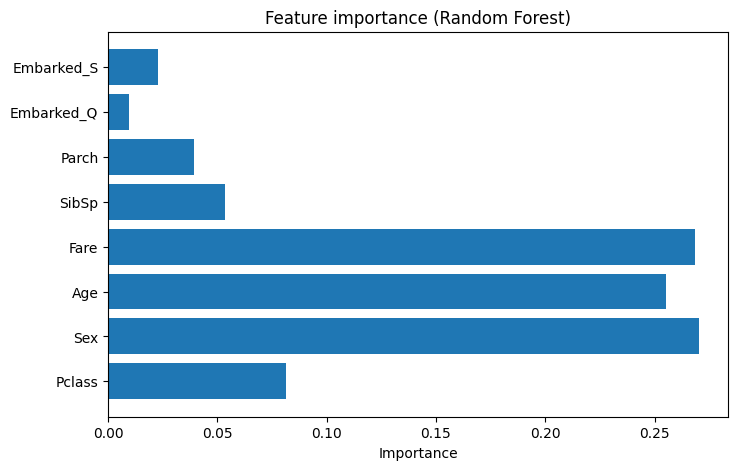

In [77]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Plot

plt.figure(figsize=(8,5))         # Set the size of the plot
plt.barh(features, importances)   # Horizontal bar chart
plt.xlabel('Importance')
plt.title('Feature importance (Random Forest)')
plt.show()

This will show you which features (like Sex, Pclass, Fare) matter most in predicting survival — critical insight for any AI project.

-> model.feature_importances_:

   This gives you a list of numbers showing how important each feature is to the Random Forest model.

-> plt.figure(figsize=(8,5))

   plt.barh(features, importances)

 This creates a horizontal bar chart:

   * Each bar = one feature

   * Bar length = how important that feature is

   * The longer the bar, the more the model relies on that feature for decision making